In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img=cv2.imread('test_data/dhoni.PNG')
img.shape

(320, 320, 3)

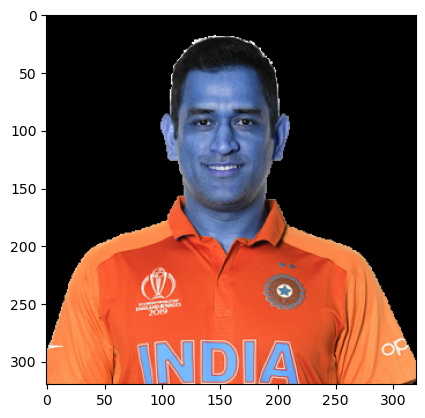

In [3]:
plt.imshow(img)

In [4]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(320, 320)

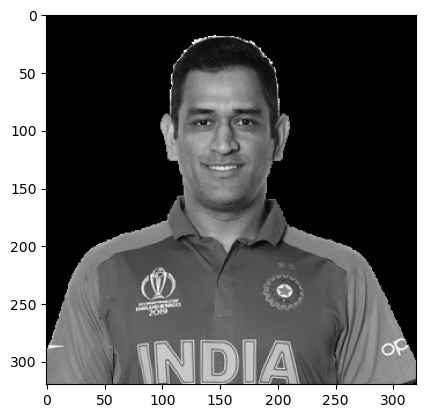

In [7]:
plt.imshow(gray,cmap='gray')

In [6]:
gray

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [131, 133, 132, ...,  43,  62,  70],
       [123, 129, 127, ...,  79,   0,   0],
       [154, 133, 134, ...,   0,   0,   0]], dtype=uint8)

In [8]:
face_cascade=cv2.CascadeClassifier('opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade=cv2.CascadeClassifier('opencv/haarcascades/haarcascade_eye.xml')

faces=face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[ 99,  48, 114, 114]])

In [9]:
(x,y,w,h)=faces[0]
x,y,w,h

(99, 48, 114, 114)

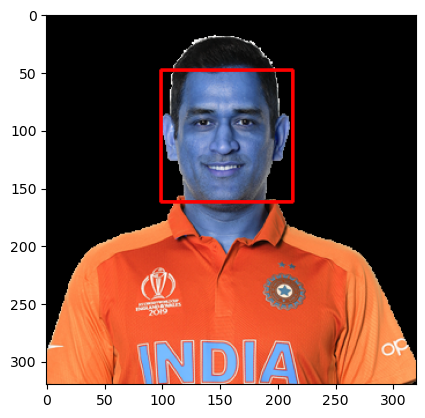

In [10]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

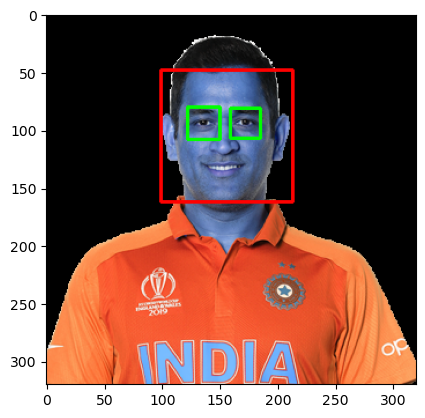

In [12]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray=gray[y:y+h, x:x+w]
    roi_color=face_img[y:y+h,x:x+w]
    eyes=eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
        
plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

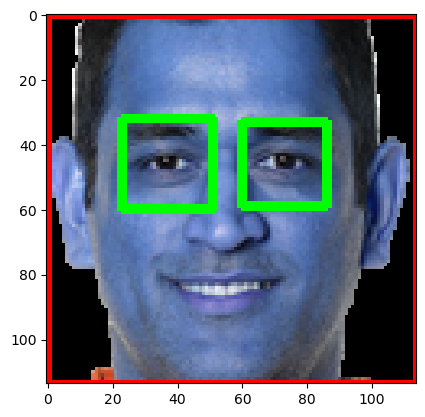

In [14]:
%matplotlib inline
plt.imshow(roi_color,cmap='gray')

In [20]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color
    

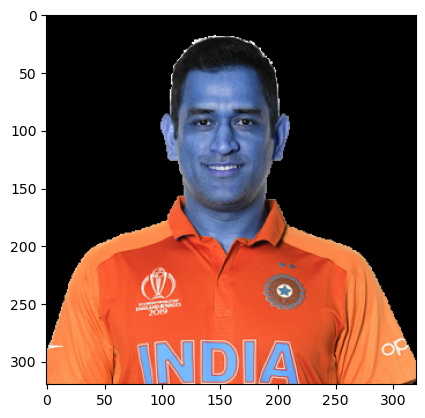

In [21]:
original_image=cv2.imread('test_data/dhoni.PNG')
plt.imshow(original_image)

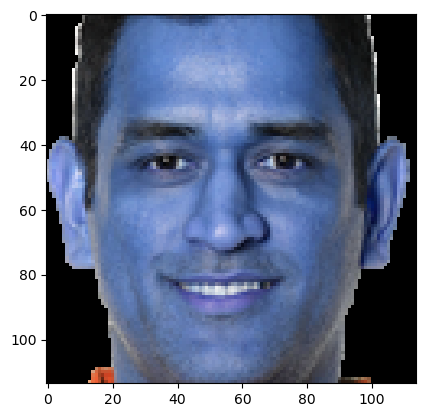

In [26]:
cropped_image=get_cropped_image_if_2_eyes('./test_data/dhoni.PNG')
plt.imshow(cropped_image)

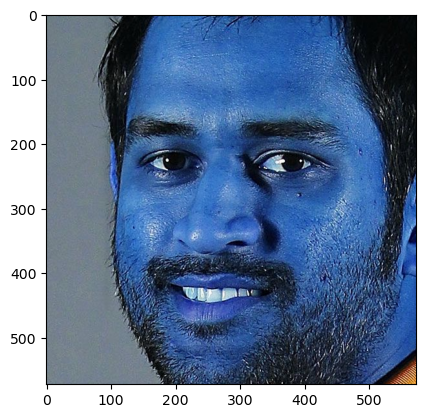

In [28]:
cropped_image=get_cropped_image_if_2_eyes('./test_data/dhoni2.jpg')
plt.imshow(cropped_image)

In [54]:
path_to_data = "./datasets/"
path_to_cr_data = "./datasets/cropped/"

In [55]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [56]:
img_dirs

['./datasets/cristiano_ronaldo',
 './datasets/lionel_messi',
 './datasets/maria_sharapova',
 './datasets/ms_dhoni',
 './datasets/roger_federer',
 './datasets/serena_williams',
 './datasets/virat_kohli']

In [57]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [58]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./datasets/cropped/cristiano_ronaldo
Generating cropped images in folder:  ./datasets/cropped/lionel_messi
Generating cropped images in folder:  ./datasets/cropped/maria_sharapova
Generating cropped images in folder:  ./datasets/cropped/ms_dhoni
Generating cropped images in folder:  ./datasets/cropped/roger_federer
Generating cropped images in folder:  ./datasets/cropped/serena_williams
Generating cropped images in folder:  ./datasets/cropped/virat_kohli


In [72]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'cristiano_ronaldo': ['./datasets/cropped/cristiano_ronaldo\\cristiano_ronaldo1.png',
  './datasets/cropped/cristiano_ronaldo\\cristiano_ronaldo10.png',
  './datasets/cropped/cristiano_ronaldo\\cristiano_ronaldo11.png',
  './datasets/cropped/cristiano_ronaldo\\cristiano_ronaldo12.png',
  './datasets/cropped/cristiano_ronaldo\\cristiano_ronaldo13.png',
  './datasets/cropped/cristiano_ronaldo\\cristiano_ronaldo14.png',
  './datasets/cropped/cristiano_ronaldo\\cristiano_ronaldo15.png',
  './datasets/cropped/cristiano_ronaldo\\cristiano_ronaldo16.png',
  './datasets/cropped/cristiano_ronaldo\\cristiano_ronaldo17.png',
  './datasets/cropped/cristiano_ronaldo\\cristiano_ronaldo18.png',
  './datasets/cropped/cristiano_ronaldo\\cristiano_ronaldo19.png',
  './datasets/cropped/cristiano_ronaldo\\cristiano_ronaldo2.png',
  './datasets/cropped/cristiano_ronaldo\\cristiano_ronaldo20.png',
  './datasets/cropped/cristiano_ronaldo\\cristiano_ronaldo21.png',
  './datasets/cropped/cristiano_ronaldo\\cr

# wavelet transformation

In [73]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'cristiano_ronaldo': 0,
 'lionel_messi': 1,
 'maria_sharapova': 2,
 'ms_dhoni': 3,
 'roger_federer': 4,
 'serena_williams': 5,
 'virat_kohli': 6}

In [78]:
import cv2
import numpy as np
import pywt

def w2d(img, mode='haar', level=1):
    imArray = img

    # Convert to grayscale if not already
    if len(imArray.shape) == 3:
        imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)

    imArray = np.float32(imArray)
    imArray /= 255

    coeffs = pywt.wavedec2(imArray, mode, level=level)

    # Set the approximation coefficients at the highest level to zero
    coeffs_H = list(coeffs)
    coeffs_H[0] = np.zeros_like(coeffs_H[0])

    imArray_H = pywt.waverec2(coeffs_H, mode)

    imArray_H *= 255
    imArray_H = np.uint8(imArray_H)

    return imArray_H


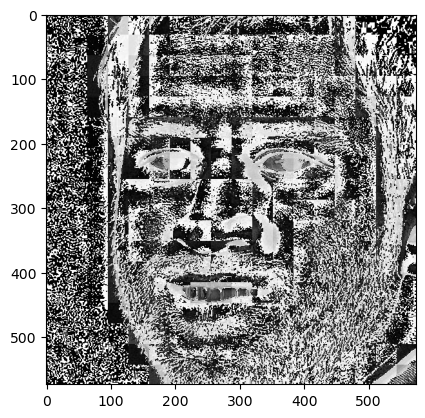

In [83]:
im_har=w2d(cropped_image,'db1',5)
plt.imshow(im_har,cmap='gray')

In [79]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])     


In [80]:
len(X[0])


4096

In [81]:
X[0]

array([[ 28],
       [ 37],
       [ 46],
       ...,
       [  0],
       [  0],
       [252]], dtype=uint8)

In [82]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(234, 4096)

In [85]:
X[0]

array([ 28.,  37.,  46., ...,   0.,   0., 252.])

# Creating model

In [86]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.711864406779661

In [90]:
print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.45      1.00      0.62        10
           1       1.00      0.60      0.75         5
           2       0.73      0.89      0.80         9
           3       1.00      0.20      0.33         5
           4       1.00      0.33      0.50        12
           5       0.88      0.78      0.82         9
           6       0.90      1.00      0.95         9

    accuracy                           0.71        59
   macro avg       0.85      0.69      0.68        59
weighted avg       0.83      0.71      0.69        59



In [91]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [95]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [96]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.754286,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.537143,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.760000,{'logisticregression__C': 1}


In [97]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [99]:
best_estimators['svm'].score(X_test,y_test)

0.7288135593220338

In [100]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8135593220338984

In [101]:
best_clf=best_estimators['logistic_regression']

In [103]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,best_clf.predict(X_test))
cm

array([[ 7,  0,  2,  0,  1,  0,  0],
       [ 0,  3,  0,  0,  0,  2,  0],
       [ 0,  0,  9,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  1,  2],
       [ 0,  0,  2,  0, 10,  0,  0],
       [ 0,  0,  1,  0,  0,  8,  0],
       [ 0,  0,  0,  0,  0,  0,  9]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

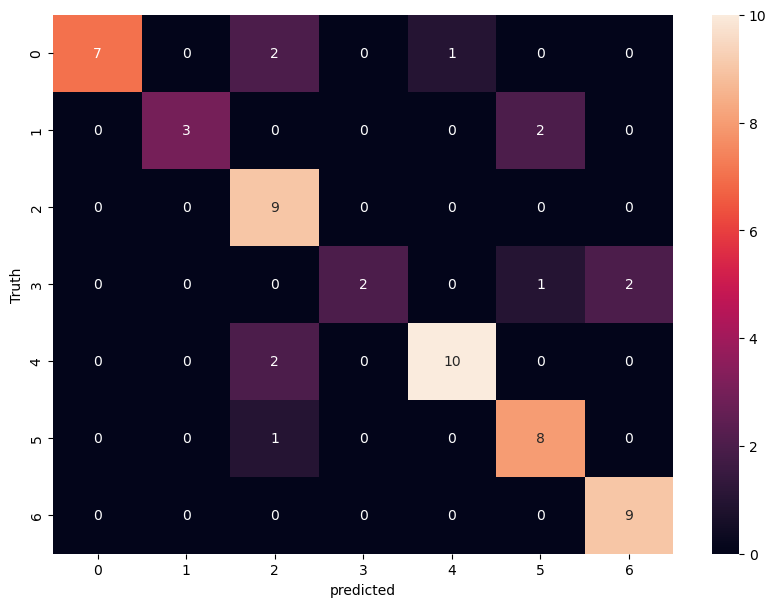

In [104]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [105]:
class_dict

{'cristiano_ronaldo': 0,
 'lionel_messi': 1,
 'maria_sharapova': 2,
 'ms_dhoni': 3,
 'roger_federer': 4,
 'serena_williams': 5,
 'virat_kohli': 6}

In [107]:
import joblib
joblib.dump(best_clf,'sport_person_classifier.pkl')

['sport_person_classifier.pkl']

In [108]:
import json
with open('class_dictionary.json','w') as f:
    f.write(json.dumps(class_dict))